In [62]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import spacy.lang.pt
from unidecode import unidecode
from string import punctuation

nltk.download('vader_lexicon')
nltk.download('rslp')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ynx/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package rslp to /home/ynx/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ynx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
dados = pd.read_csv("./AMER3.csv")

In [48]:
def combinar_paragrafos(texto_lista):
    texto = ' '.join(texto_lista.strip("[]").replace("'", "").split(", "))
    return texto

dados['texto'] = dados['texto'].apply(combinar_paragrafos)

In [4]:
analisador = SentimentIntensityAnalyzer()

In [5]:
def analisar_sentimento(texto):
    return analisador.polarity_scores(texto)

In [6]:
dados['sentimento'] = dados['texto'].apply(analisar_sentimento)

[45, 4, 1]


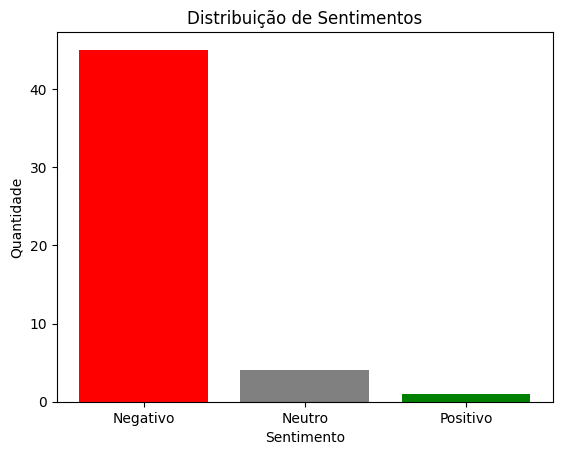

In [7]:
negativos = 0
neutros = 0
positivos = 0

# Conte os sentimentos
for analise in dados.sentimento:
    if analise['compound'] >= 0.05:
        positivos += 1
    elif analise['compound'] <= -0.05:
        negativos += 1
    else:
        neutros += 1

# Crie os rótulos e os valores para o gráfico de barras
sentimentos = ['Negativo', 'Neutro', 'Positivo']
quantidades = [negativos, neutros, positivos]

print(quantidades)

# Crie o gráfico de barras
plt.bar(sentimentos, quantidades, color=['red', 'gray', 'green'])
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.title('Distribuição de Sentimentos')
plt.show()

In [50]:
def remover_maiusculas_e_pontuacao(texto):
    texto = texto.lower()
    texto = ''.join(char for char in texto if char not in punctuation)

    return texto

dados['texto'] = dados['texto'].apply(remover_maiusculas_e_pontuacao)

In [51]:
dados.head()

,Unnamed: 0,titulo,data,hora,texto
0,0,Americanas rebate acusações do Bradesco em nov...,18.09.2023,22:21,a americanas bvmfamer3 protocolou nesta 2ª fei...
1,1,CPIs do Congresso Nacional entram em reta fina...,18.09.2023,07:59,as cpis comissões parlamentares de inquérito e...
2,2,"Ações: Braskem, IRB e Azul lideram altas do Ib...",18.09.2023,10:30,investingcom — o ibovespa subia 018 às 10h29 d...
3,3,Abertura de mercado: o que esperar do Ibovespa...,14.09.2023,09:21,investingcom – os mercados aguardam novos dado...
4,4,Bradesco afirma ter total interesse no sucesso...,13.09.2023,16:23,o bradesco bvmfbbdc4 informou nesta quartafeir...


In [12]:
token_espaco = tokenize.WhitespaceTokenizer()
frase_processada = list()
for noticia in dados.texto:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(noticia)
    stemmer = nltk.RSLPStemmer()
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
        frase_processada.append(' '.join(nova_frase))

    wordnet_lemmatizer = WordNetLemmatizer()

    for palavra in palavras_texto:
        nova_frase.append(wordnet_lemmatizer.lemmatize(palavra))
        frase_processada.append(' '.join(nova_frase))


In [39]:
stopwords = spacy.lang.pt.stop_words.STOP_WORDS

In [64]:
def tratamento(texto):
    texto_sem_acentos = unidecode(texto)
    palavras = texto_sem_acentos.split(' ')
    retorno = ''
    for p in palavras:
        if p not in stopwords:
            retorno += f"{p} "
    return retorno

dados['texto'] = dados['texto'].apply(tratamento)

In [65]:
dados.head()

,Unnamed: 0,titulo,data,hora,texto
0,0,Americanas rebate acusações do Bradesco em nov...,18.09.2023,22:21,americanas bvmfamer3 protocolou 2a feira 18set...
1,1,CPIs do Congresso Nacional entram em reta fina...,18.09.2023,07:59,cpis comissoes parlamentares inquerito curso c...
2,2,"Ações: Braskem, IRB e Azul lideram altas do Ib...",18.09.2023,10:30,investingcom -- ibovespa subia 018 10h29 brasi...
3,3,Abertura de mercado: o que esperar do Ibovespa...,14.09.2023,09:21,investingcom - mercados aguardam dados inflaca...
4,4,Bradesco afirma ter total interesse no sucesso...,13.09.2023,16:23,bradesco bvmfbbdc4 informou quartafeira 13 tot...


In [ ]:
def filtrar_palavras(texto, idioma, palavras_relevantes):
    if idioma == 'pt' or idioma == 'pt_BR':
        palavras = texto.split()
        palavras_filtradas = [word for word in palavras if word in palavras_relevantes]
        return ' '.join(palavras_filtradas)
    else:
        return ''

In [38]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras=' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
    "Frequencia":list(frequencia.values())})
    plt.figure(figsize = (12,8))
    ax=sns.barplot(data = df_frequencia.nlargest(columns="Frequencia",  n=20), x="Palavra", y="Frequencia", color="gray")
    ax.set(ylabel="Contagem")
    plt.show()

/home/ynx/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ynx/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ynx/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


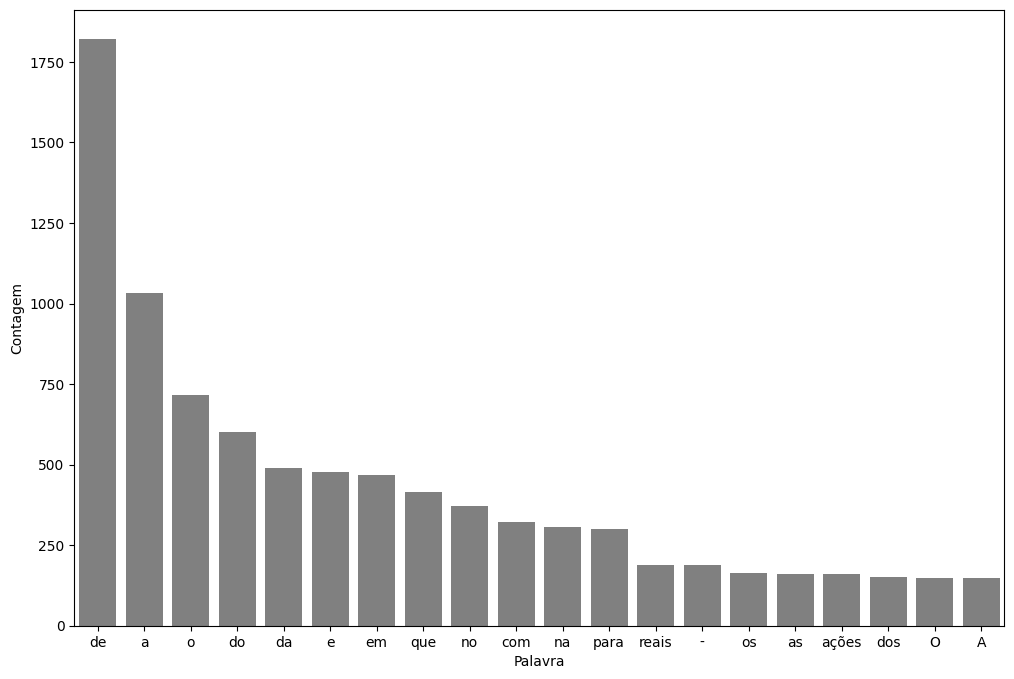

In [40]:
pareto(dados,"texto",10)

In [41]:
token_pontuacao = tokenize.WordPunctTokenizer()
pontuacao=list()
for ponto in punctuation:
    stopwords.add(ponto)

frase_processada=list()
for noticia in dados.texto:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(noticia)
    for palavra in palavras_texto:
        if palavra not in stopwords:
            nova_frase.append(palavra)
            frase_processada.append(" ".join(nova_frase))
            print(frase_processada)
    

In [42]:
dados.head()

,titulo,data,hora,texto
0,Janja e ministras participam de encontro de mu...,18.09.2023,18:04,A primeira-dama Janja Lula da Silva participou...
1,"À espera de Copom e Fed, Ibovespa inicia seman...",18.09.2023,14:44,O Ibovespa perdeu força e não conseguiu susten...
2,Fortuna de bilionários brasileiros equivale a ...,15.09.2023,14:10,O patrimônio dos 280 bilionários brasileiros l...
3,Ibovespa avança com exterior ajudando Vale e P...,14.09.2023,11:49,Por Paula Arend Laier SÃO PAULO (Reuters) - O ...
4,"Ações: Bradespar, CSN e Vale lideram altas do ...",14.09.2023,10:29,"Investing.com — O Ibovespa subia 0,86% às 10h2..."
